## Unsupervised learning using PCA only

In [ ]:
## book material from https://github.com/aapatel09/handson-unsupervised-learning

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection

# Preprocess the data (credit card transaction - detect fraud)
# TODO use notebook module to re-use functions

def get_train_test_data():
    df = pd.read_csv('C:/dev/research/temp/handson-unsupervised-learning/datasets/credit_card_data/credit_card.csv',  header=0, index_col=0)
    dataX = df.copy().drop(['Class'], axis=1)
    dataY = df['Class'].copy()

    # We need to standardize the featurs - mean 0 and std 1
    features = dataX.columns
    ss = preprocessing.StandardScaler()
    dataX.loc[:, features] = ss.fit_transform(dataX[features])
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(dataX, dataY, test_size=0.33, random_state=2018, stratify=dataY)
    return X_train, X_test, y_train, y_test

In [2]:
## Characteristics of credit card data
# 1. imbalanced - over 90% normal transactions, only small percentage of fraud data
# 2. Binary classication
# 3. Not easy to get labels in real world, fraud pattern could change easily

In [52]:
# First use sklearn PCA to get the PCA transformed data
#
# 30 principal components - all of them

from sklearn.decomposition import PCA

n_components = 25 # Number of components to keep. All is kept if not specified.
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

# in unsupervised learning there is no label. Here the label is for performance evaluation
# So in the real world how's performance/evaluation done?
X_train, X_test, y_train, y_test = get_train_test_data() 

pd_y_train = pd.DataFrame(data=y_train)
pd_X_train = pd.DataFrame(data=X_train)

X_train_pca = pca.fit_transform(X_train)
pd_X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)

X_train_pca_inverse = pca.inverse_transform(X_train_pca)
pd_X_train_pca_inverse = pd.DataFrame(data=X_train_pca_inverse, index=X_train_pca_inverse)


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

def scatterFirstSecondVectorPlot(x_dataFrame, y_dataFrame, title):
    tempDF = pd.DataFrame(data=x_dataFrame.loc[:,0:1], index=x_dataFrame.index)
    tempDF = pd.concat([tempDF, y_dataFrame], axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+title)

In [22]:
pd_X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Time,,,,,,,,,,,,,,,,,,,,,
84575.0,-0.508960,0.156840,-0.181014,0.231665,-0.353361,0.071622,0.686164,0.489794,-0.789595,-0.154856,...,-1.179171,0.056903,-0.364133,0.082471,-0.205081,-0.961454,-0.212225,0.949449,-0.322330,-0.081670
117245.0,-0.444959,-0.027516,-0.155133,0.285192,0.397519,0.553303,-0.626485,-0.684136,0.551876,1.018635,...,0.326940,-0.413090,0.751521,0.590221,-0.207454,-0.216251,-0.317084,0.606207,-0.046009,0.042515
148591.0,0.902806,0.236857,0.055641,0.284842,-0.241861,-0.768287,-0.733919,-0.289992,2.385034,2.416090,...,-0.401471,-0.576539,-0.519133,-1.938656,0.661339,1.203622,-1.460409,-0.460144,-0.009222,0.149067
89630.0,-0.413574,-0.069795,-0.164551,0.201312,0.045869,0.194804,0.244808,-0.423226,0.596021,0.404075,...,-0.529128,0.081572,0.083177,0.173427,0.106064,-0.320013,-0.199260,0.432036,-0.064142,0.053590
87121.0,-0.453554,0.279809,0.010142,0.470535,0.686224,0.424355,-0.465568,-0.560388,0.682929,-0.223680,...,0.948688,-0.665359,-0.337359,0.768776,-0.846248,-0.654282,0.000901,0.342179,-0.004501,0.051971


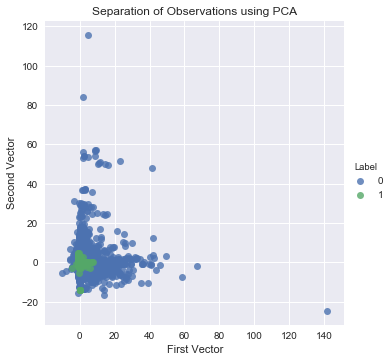

In [50]:

scatterFirstSecondVectorPlot(pd_X_train_pca, pd_y_train, "PCA")
plt.show()

In [38]:
## Directly from the book, no point to replicate a plotting function

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds

In [40]:

def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

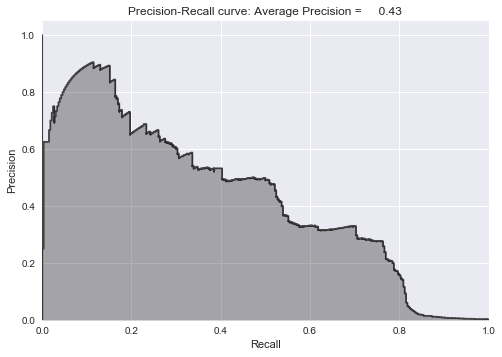

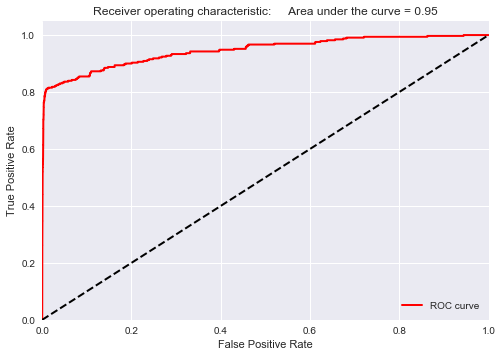

In [53]:
anomalyScoresPCA = anomalyScores(pd_X_train, pd_X_train_pca_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [ ]:
### Summary ###

# By using PCA along we can achieve ok result on a binary classification problem with imbalanced data
# With or without labels

In [ ]:
### Outstanding questions

# How to evalute performance without labelled data?
# What types of PCA to use with different data characteristics? e.g. when to use non linear PCA (e.g. Kernerl PCA)